In [ ]:
### import pandas as pd
from geopandas import GeoDataFrame
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import warnings
import helpers_ses_prediction as hsp
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('/datastore/complexnet/jlevyabi/network_representation/python_scripts/')
import helpers_ses_prediction as hsp
from geopandas import sjoin

In [3]:
f=open("/datastore/complexnet/jlevyabi/ml_soc_econ/data_files/UKSOC_rep/linkedin/"+
       "linkedin_data/linkedin_usrs_profile_unique.txt","r")
data=[]
not_data=[]

for line in tqdm(f.readlines()):
    info=line.split("\t")
    if len(info)<2 or "http" not in line or "linkedin.com/in/" not in line:
        not_data.append(line)
        continue
    foo_indexes = [x for x in info if "linkedin.com/in/" in x]
    data.append((info[0],info[1],foo_indexes[0].replace("\n","")))
    
data_linked_accounts=pd.DataFrame(data,columns=["usr","username","account"])
what_happened=pd.DataFrame(not_data,columns=["string"])
data_linked_accounts.to_csv(
    "/datastore/complexnet/jlevyabi/ml_soc_econ/data_files/UKSOC_rep/linkedin/twitter_linked_accounts.csv",sep="\t")

100%|██████████| 83414/83414 [00:00<00:00, 483247.80it/s]


In [4]:
dgeo=pd.read_csv(header=None,sep="\t",
                 filepath_or_buffer="/datastore/complexnet/jlevyabi/geoloc/txt_files/2014-2015_locs.txt",
                names=["usr","time","lat","lon"])
dgeo["usr"]=[int(x) for x in dgeo.usr]
geo_usrs=list(set(dgeo.usr))
dic_geo_linked=data_linked_accounts[[x in geo_usrs for x in tqdm(data_linked_accounts.usr)]]

100%|██████████| 15954/15954 [01:56<00:00, 137.06it/s]


In [ ]:
import pandas as pd
linkedin=pd.read_csv(
    "/datastore/complexnet/jlevyabi/ml_soc_econ/data_files/UKSOC_rep/linkedin/linkedin_data/full_linked_info.csv")

In [12]:
a

NameError: name 'a' is not defined

In [6]:
len(set(geo_usrs).intersection(set(linkedin.twitter_id)))

431

In [11]:
df_final=pd.read_csv("/datastore/complexnet/jlevyabi/geoloc/locs_gt5_nb_locs_users_no_weekend_insee.csv",sep=";")
df_final.drop("income",axis=1,inplace=True)
df_final["income"]=df_final["ind_srf"]/df_final["ind_r"]
df_final["owner_ratio"]=df_final["men_prop"]/df_final["ind_r"]
df_final["density"]=df_final["ind_r"]/(0.04*df_final["nbcar_x"])
df_final.drop(["income.1","Unnamed: 0","nbcar_x"],axis=1,inplace=True)
df_final.head(1)

,usr,lat,lon,day,hour,minu,sec,year,month,fecha,...,ind_age7,i_age7,ind_age8,i_age8,ind_srf,nbcar_y,geometry.1,income,owner_ratio,density
0,1263741576,49.223577,6.057225,3,20,11,1,2014,6,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dic_insee_linked=pd.merge(data_linked_accounts,dic_insee_avg,on="usr",how="inner")

In [ ]:
data_linkedin_not_void=pd.read_csv("~/seacabo/data_files/salary_databases/linkedin_prof_jdn.csv",sep="\t",header=0)
data_linkedin_not_void.head()

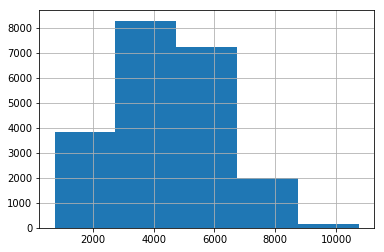

In [18]:
import matplotlib.pyplot as plt
data_linkedin_not_void[data_linkedin_not_void.salary_0<12000]["salary_0"].hist(bins=5)
plt.show()

In [2]:
import logging
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
from collections import Counter
from unidecode import unidecode as decod
from gensim.utils import simple_preprocess
import re
from gensim import corpora, models
import gensim

In [3]:
df_final=pd.read_csv("/datastore/complexnet/jlevyabi/ml_soc_econ/data_files/UKSOC_rep/linkedin/linkedin_data/linkedin_usrs.csv")

/home/jlevyabi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (31,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_skills=[]
skills=[]

marker="####"
for it,row in tqdm(df_final.iterrows()):
    pre_all_skills=row.Skills
    if len(pre_all_skills)==0 or pre_all_skills=='"':
        continue
    usr_skills=[]
    inter=re.split(',|: ',pre_all_skills)
    control=re.split(',|: ',pre_all_skills)[:]
    boola=0
    for indx in range(len(inter)-1):
        if not(inter[indx].isdigit()) and not(inter[indx+1].isdigit()):
            start=indx
            nex=indx+1
            while not(inter[nex].isdigit()) and nex<len(inter)-1:
                nex+=1
            inter[indx]=" ".join(inter[indx:nex])
            for ind in range(indx+1,nex):
                inter[ind]=marker
            boola=1
    pre_pre_final=[x.replace('"','') for x in inter if marker not in x]
    if pre_pre_final[0]==' ':
        del pre_pre_final[0]
    if pre_pre_final[-1]==' ':
        del pre_pre_final[-1]
    for indx in range(len(pre_pre_final)-1): 
        if not(pre_pre_final[indx].isdigit()) and not(pre_pre_final[indx+1].isdigit()):
            pre_pre_final[(indx+1):(indx+1)]=['0']
    pre_final=[]
    for new_indx in range(0,len(pre_pre_final),2):
        pre_final.append((decod(pre_pre_final[new_indx].lower()),
                          int(pre_pre_final[new_indx+1])))
    df=pd.DataFrame(pre_final,columns=["Skill","Upvotes"])
    df_skills.append(df)

skills=[[skill for skill in df.Skill] for df in df_skills ]
upvotes=[[upv for upv in df.Upvotes] for df in df_skills ]


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [5]:
skill2int={skill:it for it,skill in enumerate(set([y for x in skills for y in x]))}

In [6]:
mat=np.zeros((len(skills),len(skill2int)))
it=0
for usr_skills,usr_upvotes in zip(skills,upvotes):
    for skill,upvote in zip(usr_skills,usr_upvotes):
        mat[it,skill2int[skill]]=upvote
    it+=1

In [7]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

n_samples = 2000
n_topics = 20
n_top_words = 20
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(mat)


In [8]:
W = nmf.fit_transform(mat);
H = nmf.components_;
nR = np.dot(W,H)
print (nR)


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.46904216e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.00636097e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.07309721e-05
  1.18225238e-04 3.11162338e-07]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.81987507e-05
  1.37848397e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.81017535e-05
  4.66646971e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.64202638e-05
  5.63488015e-02 0.00000000e+00]]


In [12]:
(nmf.components_).shape

(20, 12678)

In [10]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


In [11]:
print_top_words(nmf, list(skill2int.keys()), n_top_words)

Topic #0:
 social media marketing   project management   sales management   business development   marketing communications   human resources   sales  marketing strategy   talent management   communication   sales process   business intelligence   event management   talent acquisition   marketing management   management consulting   business process   business planning   sales operations   business 
Topic #1:
 management   change management   team management  change management   strategie   marketing   developpement commercial   gestion d'equipe   strategie commerciale   project management   leadership   gestion de projet   consulting  telecommunications   outsourcing   it strategy   integration   human resources   sourcing   formation 
Topic #2:
 marketing digital   reseaux sociaux   marketing en ligne   strategie numerique   social media   community management   web marketing  digital strategy   gestion des communautes   web 2.0   linkedin   strategie   strategie marketing   blogging

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 20


t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)
T

In [39]:
dictionary = corpora.Dictionary(skills)
corpus = [[(sk[0],upv+1)for sk,upv in zip(dictionary.doc2bow(skill),upvote)]
          for skill,upvote in zip(skills,upvotes)]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=20)

'0.094*" communication marketing " + 0.080*" marketing " + 0.063*" strategie marketing " + 0.057*" gestion de projet " + 0.054*" marketing digital "'

In [50]:
(dat['doc_topic_dists']).shape
num_topics=10
mat_topic_dists=np.zeros((len(corpus),num_topics))
for i in range(len(corpus)):
    for ent,val in ldamodel[corpus[i]]:
        mat_topic_dists[i,ent]=val
dat['doc_topic_dists']=mat_topic_dists

[(1, 0.077897295),
 (5, 0.19184312),
 (6, 0.10205888),
 (7, 0.42515936),
 (9, 0.19754651)]

In [60]:
dat['topic_term_dists'].shape
num_topics=10
mat_term_dists=np.zeros((num_topics,len(list(skill2int.keys()))))
for i in range(num_topics):
    for sk,val in ldamodel.show_topic(i,100):
        mat_term_dists[i,skill2int[sk]]=val
dat['topic_term_dists']=mat_term_dists

In [61]:
dat['term_frequency']=[]for 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
ldamodel.print_topic(0,topn=20)

'0.099*" communication marketing " + 0.058*" marketing en ligne " + 0.052*" marketing digital " + 0.038*" event management " + 0.034*" e-commerce " + 0.031*" digital marketing " + 0.026*" marketing strategy " + 0.024*" english " + 0.023*" cms " + 0.023*" marketing " + 0.022*" marketing social " + 0.020*" facebook " + 0.020*" sem " + 0.019*" gestion d\'evenement " + 0.018*" reseaux sociaux " + 0.017*" strategie marketing " + 0.016*" marketing par e-mail " + 0.015*" email marketing " + 0.015*" start-up " + 0.014*" twitter "'

In [11]:
# split into train and test - random sample, but preserving order
import random
train_size = int(round(len(corpus)*0.8))
train_index = sorted(random.sample(range(len(corpus)), train_size))
test_index = sorted(set(range(len(corpus)))-set(train_index))
train_corpus = [corpus[i] for i in train_index]
test_corpus = [corpus[j] for j in test_index]

In [17]:
number_of_words = sum(cnt for document in test_corpus for _, cnt in document)
parameter_list = range(1,100,10)
grid={key:[] for key in parameter_list}
for parameter_value in parameter_list:
    print ("starting pass for parameter_value = %.3f" % parameter_value)
    model = models.LdaMulticore(corpus=train_corpus, workers=20, id2word=dictionary, num_topics=parameter_value, passes=20)
    
    perplex = model.bound(test_corpus) # this is model perplexity not the per word perplexity
    print ("Total Perplexity: %s" % perplex)
    grid[parameter_value].append(perplex)
    
    per_word_perplex = np.exp2(-perplex / number_of_words)
    print ("Per-word Perplexity: %s" % per_word_perplex)
    grid[parameter_value].append(per_word_perplex)
    print(" ")
    
for numtopics in parameter_list:
    print (numtopics, '\t',  grid[numtopics])


starting pass for parameter_value = 1.000
Total Perplexity: -166239.11351
Per-word Perplexity: 281.3483056
 
starting pass for parameter_value = 11.000
Total Perplexity: -203216.751059
Per-word Perplexity: 986.382825009
 
starting pass for parameter_value = 21.000
Total Perplexity: -230833.695336
Per-word Perplexity: 2517.28946962
 
starting pass for parameter_value = 31.000
Total Perplexity: -258043.426553
Per-word Perplexity: 6336.08857805
 
starting pass for parameter_value = 41.000
Total Perplexity: -281587.101697
Per-word Perplexity: 14083.0382484
 
starting pass for parameter_value = 51.000
Total Perplexity: -304878.705603
Per-word Perplexity: 31035.4213641
 
starting pass for parameter_value = 61.000
Total Perplexity: -328007.326303
Per-word Perplexity: 68017.0292157
 
starting pass for parameter_value = 71.000
Total Perplexity: -353313.973053
Per-word Perplexity: 160497.066687
 
starting pass for parameter_value = 81.000
Total Perplexity: -374725.434894
Per-word Perplexity: 331

In [ ]:
import wordcloud
elements = wordcloud.fit_words(freqs, width=120, height=120)
wordcloud.draw(elements, "gs_topic_%d.png" % (curr_topic), width=120, height=120)
